In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Učitavanje obrađenih podataka

In [2]:
dataset = pd.read_csv('../data/data_processed.csv')

dataset.head()

,Humidity Level,Temperature,Luring Success,Time Spent Hunting,Prey Size,Ambush,Predator Presence,Is Competition,Time of Day_Afternoon,Time of Day_Evening,Time of Day_Morning,Food Availability_High,Food Availability_Low,Food Availability_Medium,Hunting Success
0,0.32,31.25,1,0.81,6.60,0,1,0,0,0,1,1,0,0,0
1,0.66,29.08,0,2.81,5.38,0,0,0,1,0,0,0,1,0,1
2,0.61,25.74,1,3.79,15.19,1,0,0,0,1,0,0,1,0,1
3,0.37,22.68,0,4.27,5.06,1,1,0,0,0,1,0,1,0,1
4,0.65,29.20,0,3.84,2.71,0,0,0,1,0,0,1,0,0,1


Histogram

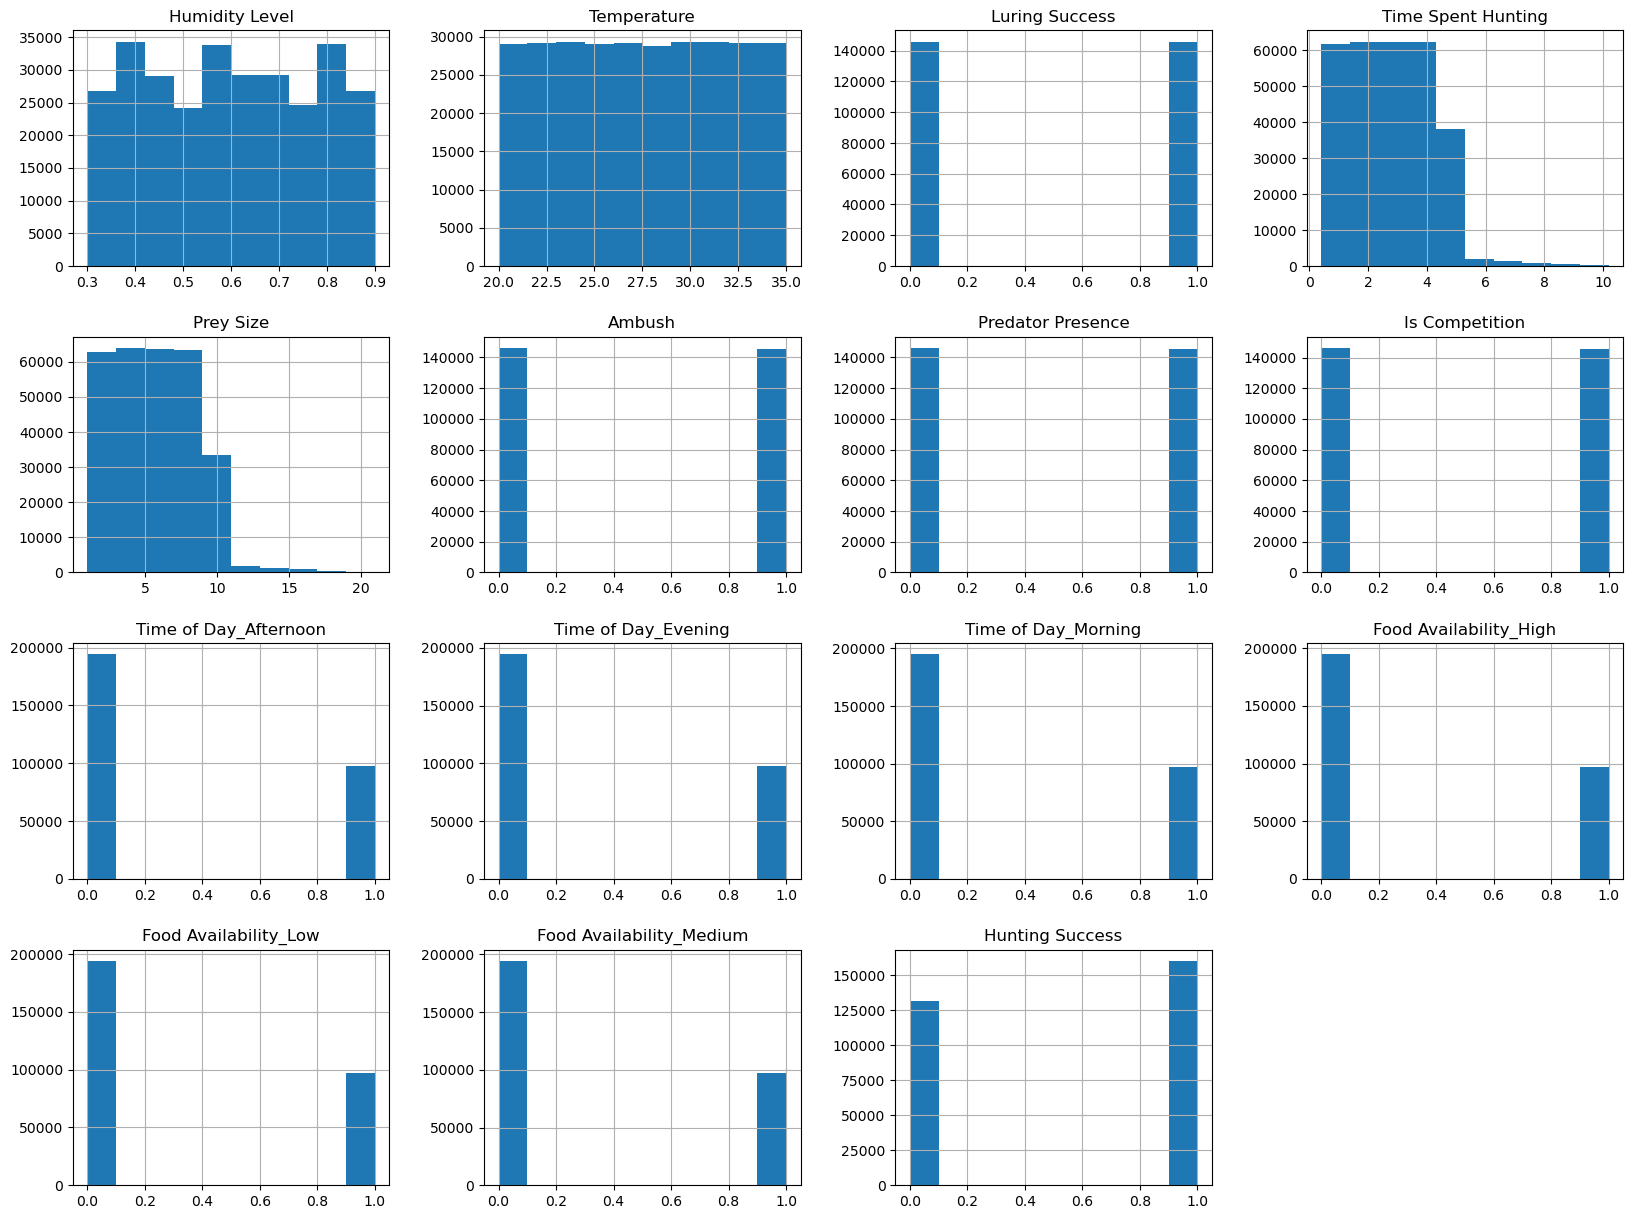

In [5]:
dataset.select_dtypes(include=['float', 'int']).hist(figsize=(20, 15))
plt.show()

Boxplots


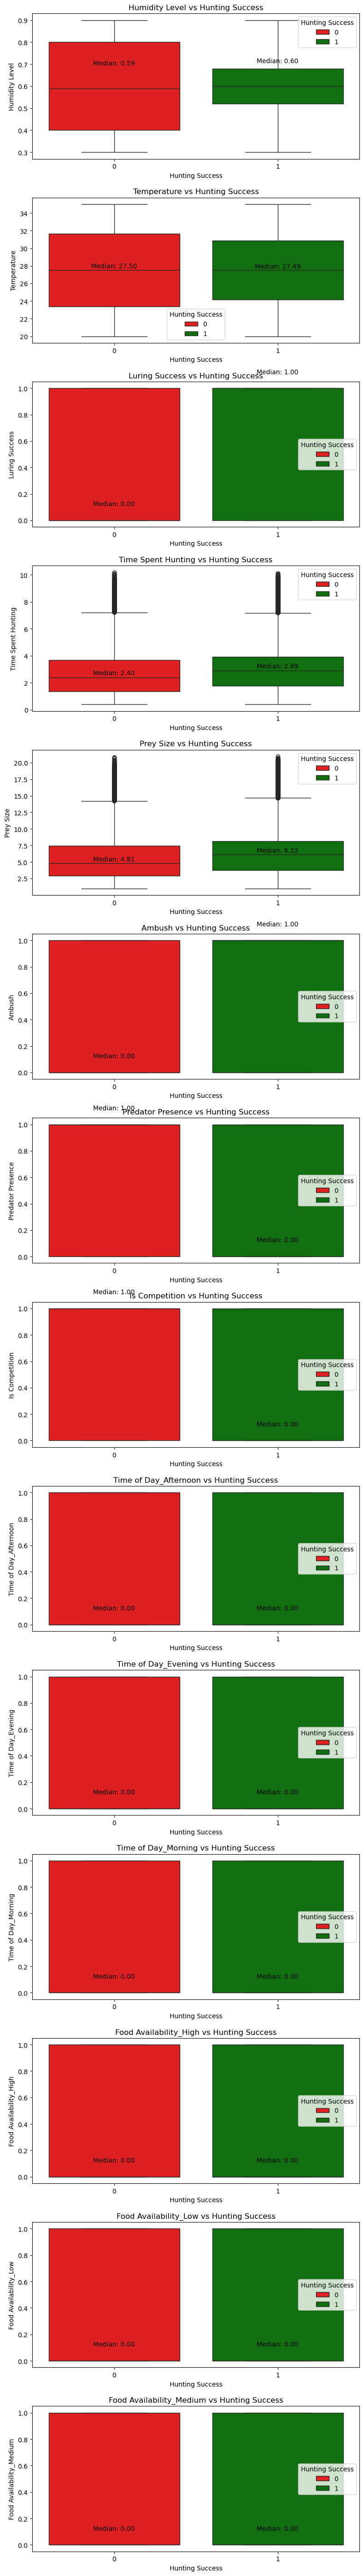

In [ ]:
num_cols = dataset.select_dtypes(include=['float', 'int']).columns.tolist()

num_cols.remove('Hunting Success')
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(x='Hunting Success', y=col, data=dataset, ax=axes[i], palette=('red', 'green'), hue='Hunting Success')
    axes[i].set_title(f'{col} vs Hunting Success')

    medians = dataset.groupby('Hunting Success')[col].median()
    for j, median in enumerate(medians):
        axes[i].text(j, median + 0.1, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()